In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_AW_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,322,0,2,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,67.0,3.0,115.0,564,0,2,160.0,0.0,1.6,2.0,0.0,7.0
2,1.0,57.0,2.0,124.0,261,0,0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4.0,128.0,263,0,0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2.0,120.0,269,0,2,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172.0,199,1,0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2.0,120.0,263,0,0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2.0,140.0,294,0,2,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4.0,140.0,192,0,0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	7
float64		column 2	7
float64		column 3	7
float64		column 4	7
int64		column 5	0
int64		column 6	0
int64		column 7	0
float64		column 8	36
float64		column 9	7
float64		column 10	8
float64		column 11	49
float64		column 12	28
float64		column 13	15


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,263.000000,263.000000,263.000000,263.000000,270.000000,270.000000,270.000000,234.000000,263.000000,262.000000,221.000000,242.000000,255.000000
mean,0.673004,54.380228,3.167300,131.361217,249.659259,0.148148,1.022222,150.696581,0.326996,1.026718,1.579186,0.673554,4.705882
std,0.470010,8.980466,0.946344,17.640243,51.686237,0.355906,0.997891,22.395725,0.470010,1.096691,0.617415,0.940581,1.943028
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,95.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,213.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,154.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,280.000000,0.000000,2.000000,167.750000,1.000000,1.600000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,3.000000,3.000000,7.000000


<AxesSubplot:>

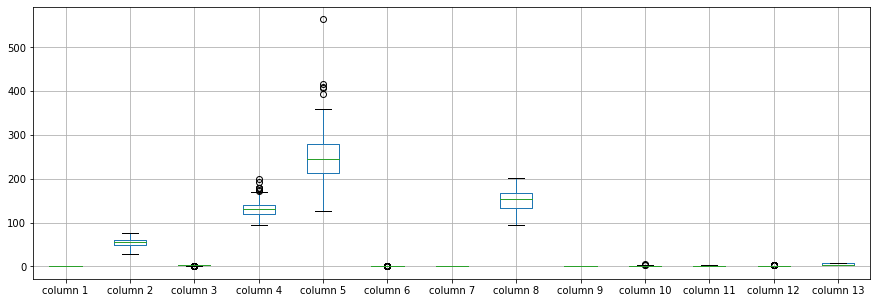

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.673004
column 2      54.380228
column 3       3.167300
column 4     131.361217
column 5     249.659259
column 6       0.148148
column 7       1.022222
column 8     150.696581
column 9       0.326996
column 10      1.026718
column 11      1.579186
column 12      0.673554
column 13      4.705882
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.091599,0.049769,-0.062055,-0.205395,0.046943,0.045856,-0.047169,0.181901,0.128119,0.001922,0.095409,0.382855
column 2,-0.091599,1.000000,0.100272,0.254956,0.243668,0.115287,0.146978,-0.422534,0.084900,0.193464,0.162089,0.370181,0.168958
column 3,0.049769,0.100272,1.000000,-0.068711,0.104249,-0.072791,0.065327,-0.287656,0.327080,0.183576,0.139804,0.234884,0.289176
column 4,-0.062055,0.254956,-0.068711,1.000000,0.171236,0.131811,0.110701,-0.045343,0.084669,0.212897,0.134888,0.089695,0.128642
column 5,-0.205395,0.243668,0.104249,0.171236,1.000000,0.025186,0.167652,-0.031126,0.073204,0.062646,0.005899,0.156932,0.052665
column 6,0.046943,0.115287,-0.072791,0.131811,0.025186,1.000000,0.053499,0.012679,-0.017170,-0.008248,0.059498,0.117976,0.058828
column 7,0.045856,0.146978,0.065327,0.110701,0.167652,0.053499,1.000000,-0.101928,0.076210,0.112747,0.151314,0.142754,0.007992
column 8,-0.047169,-0.422534,-0.287656,-0.045343,-0.031126,0.012679,-0.101928,1.000000,-0.380988,-0.373639,-0.358018,-0.294218,-0.266105
column 9,0.181901,0.084900,0.327080,0.084669,0.073204,-0.017170,0.076210,-0.380988,1.000000,0.277127,0.259849,0.185791,0.318788
column 10,0.128119,0.193464,0.183576,0.212897,0.062646,-0.008248,0.112747,-0.373639,0.277127,1.000000,0.553119,0.238494,0.310346


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+6,13+6+6,13+6+6+6,13+6+6+6+6,13+6+6+6+6+6,13+6+6+6+6,13+6+6+6,13+6+6,13+6,13], vae_layer = False, seed = 6)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 583.7716865539551
Epoch: 1 , loss: 584.6231918334961
Epoch: 2 , loss: 583.3278579711914
Epoch: 3 , loss: 583.5871620178223
Epoch: 4 , loss: 582.3077354431152
Epoch: 5 , loss: 583.2506370544434
Epoch: 6 , loss: 586.9335556030273
Epoch: 7 , loss: 582.5908622741699
Epoch: 8 , loss: 581.693229675293
Epoch: 9 , loss: 584.8965339660645
Epoch: 10 , loss: 585.5507125854492
Epoch: 11 , loss: 583.622989654541
Epoch: 12 , loss: 581.5868072509766
Epoch: 13 , loss: 583.7886276245117
Epoch: 14 , loss: 583.3893280029297
Epoch: 15 , loss: 582.5171089172363
Epoch: 16 , loss: 583.8856544494629
Epoch: 17 , loss: 583.4609184265137
Epoch: 18 , loss: 584.3467903137207
Epoch: 19 , loss: 583.3096771240234
Epoch: 20 , loss: 584.5313949584961
Epoch: 21 , loss: 584.1463317871094
Epoch: 22 , loss: 582.1943550109863
Epoch: 23 , loss: 586.6697998046875
Epoch: 24 , loss: 584.5969161987305
Epoch: 25 , loss: 583.3603591918945
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
266,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
267,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
268,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(950.2471466622643, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.17549226221539424

In [18]:
new_df.iloc[66,:]

column 1       1.0
column 2      51.0
column 3       4.0
column 4     140.0
column 5     261.0
column 6       0.0
column 7       2.0
column 8     186.0
column 9       1.0
column 10      0.0
column 11      1.0
column 12      0.0
column 13      3.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,322,0,2,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,67.0,3.0,115.0,564,0,2,160.0,0.0,1.6,2.0,0.0,7.0
2,1.0,57.0,2.0,124.0,261,0,0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4.0,128.0,263,0,0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2.0,120.0,269,0,2,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172.0,199,1,0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2.0,120.0,263,0,0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2.0,140.0,294,0,2,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4.0,140.0,192,0,0,148.0,0.0,0.4,2.0,0.0,6.0


In [20]:
imputations[-1].to_excel("Sheart_AW_5(imp).xlsx", index=False, header=False)